<a href="https://colab.research.google.com/github/zaeyonz/Fish_distribution/blob/main/Fish_distribution_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data 준비 (pandas)***

*   read_csv() 함수로 CSV파일을 dataframe으로 변환

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()         # 처음 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
#Species 열에서 고유한 값을 추출  --> unique()사용

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


---
# ***Species 열을 target으로 설정, 나머지 5개 열은 input data로 사용***

*   input data, target data 생성
---

In [3]:
 # dataframe에서 여러 열을 선택하면 새로운 dataframe이 반환됨, 이를 to_numpy() 메서드로 numpy 배열로 변환하여 fish_input에 저장함

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

print(fish_input[:5])           # 처음 5개 행 출력 (numpy 배열 상태라서 head() 사용 불가)

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# target data 생성

fish_target = fish['Species'].to_numpy()

# ***input data와 target data를 train, test로 분류***
*   train_test_split 사용

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

*   ***scikit-leearn의 StandardScaler 클래스를 사용하여 train set와 test set를 표준화 전처리 해야함!!!***
*   ***train set의 통계 값으로 test set를 변환해야 함!***

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# ***K-최근접 이웃 분류기의 확률 예측***


In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)            # 최근접 이웃 개수인 k를 3으로 지정
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))         #train set의 점수 확인
print(kn.score(test_scaled, test_target))           #test set의 점수 확인

0.8907563025210085
0.85


*   앞서 fish dataframe에서 7종류의 생선이 있었음
*   **target data를 만들 때 fish['Species']를 사용해 만들었기 때문에 train_target과 test_target에도 7종류의 생선이 들어가 있음**

 ***이렇게 target data에 2개 이상의 클래스가 포함된 문제를 다중 분류 (Multi-class classification)라고 부름***
---

*   앞선 예제에선 target 값을 0과 1로 이진 분류를 하였음.
*   **다중분류에서 또한 숫자로 타깃값을 바꾸어 입력할 수 있지만, scikit-learn에선 문자열 그대로 target 값을 사용 가능함**

*   주의!! --> target 값을 그대로 scikit-learn model에 전달하면 *순서가  자동으로 알파벳 순으로 매겨짐*
*   **따라서 pd.unique(fish['Species'])로 출력했던 순서와 다름!!**

In [8]:
# KNeighborsClassifier에서 정렬된 target 값은 classes_ 속성에 저장되어 있음

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


↑  'Bream'이 첫 번째 클래스,  'Parkki'가 두 번째 클래스가 되는 식임

In [9]:
# predict() 메서드는 친절하게도 타깃값으로 예측을 출력함

print(kn.predict(test_scaled[:5]))      # test set에 있는 처음 5개 샘플의 target 값을 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


***scikit-learn의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환함***

In [10]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])       #test set에 있는 처음 5개 샘플에 대한 확률을 출력
print(np.round(proba, decimals = 4))            #decimal parameter로 소수점 네 번째 자리까지 표기, 5번째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [11]:
# 위 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


*   네 번째 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고 세 번째 클래스인 'Perch'가 2개임
*   ***따라서 'Roach'의 확률은 1/3 = 0.3333, 'Perch'의 확률은 2/3 = 0.6667임***
*   ***위 모델은 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3 이 전부임 --> 부족함!!***

# ***Logistic Regression (로지스틱 회귀)***
*   이름은 회귀이지만 분류 모델임.  이 알고리즘은 선형회귀와 동일하게 선형 방정식을 학습함



 ***z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f***

*   a,b,c,d,e는 가중치 혹은 계수임.  특성은 늘어났지만 앞서 다룬 다중 회귀를 위한 선형 방정식과 같음
*   z는 어떤 값도 가능함, 하지만 확률이 되려면 0 ~ 1 (또는 0~100%) 사이 값이 되어야 함
*   따라서 0 ~ 1 사이 범위로 만들기 위해 ***Sigmoid function (또는 Logistic function)***을 사용하면 가능함
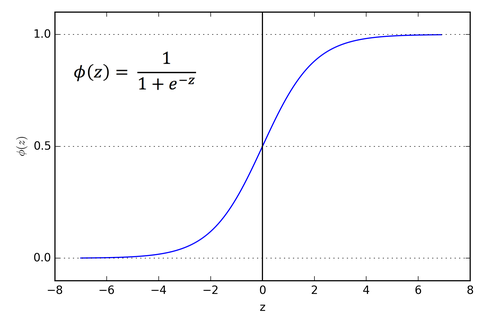

↑  ***Sigmoid function & Sigmoid function Graph***

*   z가 무한하게 큰 음수일 경우 이 함수에는 0, 무한하게 큰 양수일 땐 1에
가까워짐
*   z가 0이 될 때는 0.5가 됨

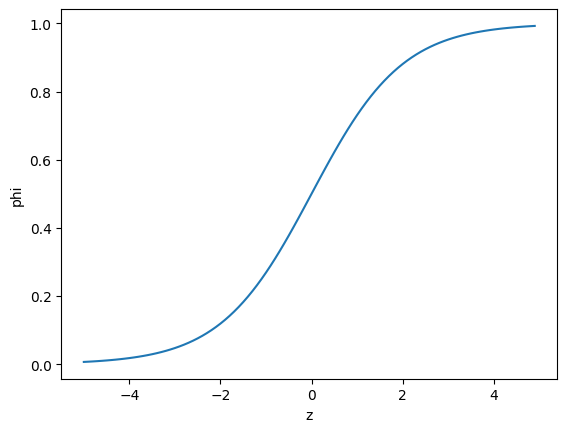

In [12]:
# Sigmoid function 그리기

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# ***Logistic Regression으로 이진 분류 수행***

* numpy 배열은 True, False 값을 전달하여 행을 선택할 수 있음 ---> ***Boolean indexing(불리언 인덱싱)***

In [13]:
# Boolean indexing example

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [14]:
# 도미(Bream)와 빙어(Smelt) 의 행만 골라내기

bream_smelt_indexes = (train_target== 'Bream') | (train_target == 'Smelt')      # 비트 OR 연산자(|)를 사용하여 도미와 빙어에 대한 행만 골라냄
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

*   bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외는 모두 False 값이 들어있음
*  ***bream_smelt_indexes 배열을 사용해 train_scaled와 train_target 배열에 Boolean indexing을 적용*** 하면 쉽게 도미와 빙어 데이터만 골라낼 수 있음

# ***Model Training***
*   Using LogisticRegression class

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [16]:
#  train_bream_smelt에 있는 처음 5개 샘플을 예측

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [17]:
# predict_proba()를 이용하여 처음 5개 샘플의 예측 확률을 출력

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


*   k-최근접 이웃 분류기에서 보았듯이 scikit-learn은 target값을 알파벳 순으로 정렬하여 사용
*   따라서 ***Smelt(빙어)가 양성 클래스(1, 두 번째 열)임!!***

In [19]:
# classes_ 속성에서 확인     --->  빙어(Smelt)가 양성 클래스
print(lr.classes_)

['Bream' 'Smelt']


In [20]:
# 선형 회귀에서처럼 Logistic Regression가 학습한 계수 확인

print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


***z = -0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013 * (Height) - 0.732 * (Width) - 2.161***

*   Logistic Regression은 Linear Regression과 매우 유사
*   LogisticRegression 모델로 z 값을 계산 할 수 있음
*   decision_function() 메서드로 z 값 출력 가능

In [21]:
# train_bream_smelt의 처음 5개 샘플의 z 값 출력

decisions = lr.decision_function(train_bream_smelt)[:5]
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


*   위 z 값을 Sigmoid 함수에 통과 시키면 확률을 얻을 수 있음
*   파이썬의 scipy 라이브러리에도 Sigmoid 함수인 ***expit()***이 있음
*   np.exp() 함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전함

In [22]:
# z 값을 확률로 변환

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


*   출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일함
*   ***즉 decision_function() 메서드는 양성 클래스에 대한 z 값을 반환함***

# ***Multiple Classification using Logistic Regression(로지스틱 회귀로 다중 분류 수행하기)***

*   LogisticRegression 클래스를 사용해 7개의 생선을 분류함
*   LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함
---
*   max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100임 --> ***충분하게 훈련시키기 위해 반복 횟수를 1000으로 늘림***
*   LogisticRegression은 기본적으로 Ridge Regression과 같이 *계수의 제곱을 규제함*  --> ***L2 규제*** 라고도 함
*   Ridge Regression에서 alpha 값이 커지면 규제도 커짐 --> LogisticRegression에선 규제를 제어하는 배개변수는 ***C***임
*   ***C는 alpha와 반대로 작을수록 규제가 커짐*** --> 기본값 : 1, ***규제를 완화하기 위해 20으로 늘림***

In [23]:
# LogisticRegression 클래스로 Multiple Classification을 훈련

lr = LogisticRegression(C=20 , max_iter = 1000)     # C 값 20, max_iter값 1000으로 변경
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


↑ train set 와 test set에 대한 점수가 높고 과대, 과소적합은 없어보임


In [27]:
# test set의 처음 5개 샘플에 대한 예측 출력

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
# test set의 처음 5개 샘플에 대한 예측 확률 출력

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


*   5개 샘플에 대한 예측이므로 5개 행 출력
*   7개 생선에 대한 확률을 계산했으므로 7개의 열 출력
*   이진 분류일 경우 2개의 열만 있었음

In [32]:
# 열의 정보 확인 (알파벳 순)

print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
# 다중 분류일 경우 선형방정식의 모습 --> coef_와 intercept_의 크기 출력

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


*   5개의 특성을 사용하므로 coef_ 배열의 열은 5개
*   coef_ 와 intercept_ 의 행이 7개임 --> 이진 분류에서 보았던 z를 7개나 계산함
*   다중 분류는 클래스마다 z 값을 하나씩 계산함 --> 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨
*   ***다중 분류는 Softmax 함수를 사용하여 7개의 z 값을 확률로 변환함***
----




#    ***Softmax function***

*   소프트 맥스 함수는 ***여러개의 선형 방정식의 출력값을 0 ~ 1사이로 압축하고 전체 합이 1이 되도록 만듦***
*   이를 위해 지수 함수를 사용하기 때문에 ***정규화된 지수 함수*** 라고도 부름

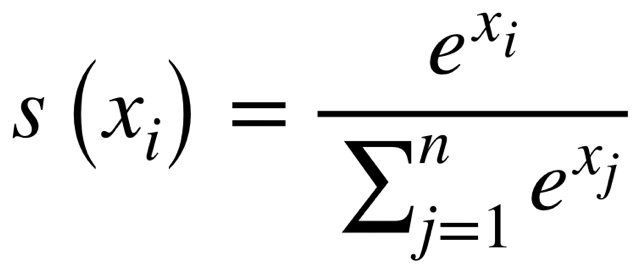

In [34]:
# decision_function() 메서드로 test set의 처음 5개 샘플에 대한 z1 ~ z7 까지의 값을 구함

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [39]:
# scipy가 제공하는 소프트맥스 함수로 앞선 z1 ~ z7 값을 확률로 변환

from scipy.special import softmax

proba = softmax(decision, axis=1)           # axis=1 로 지정하여 각 행, 즉 각 샘플에 대한 소프트맥스를 계산함, axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트 맥스를 계산함
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
